<a href="https://colab.research.google.com/github/hongkwangpyo/2020_dip_learning/blob/master/0810_3_keras_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from collections import Counter

from sklearn.preprocessing import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


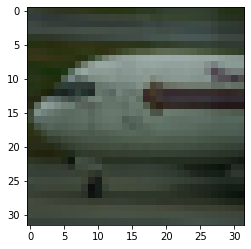

In [15]:
plt.imshow(x_train[5521])

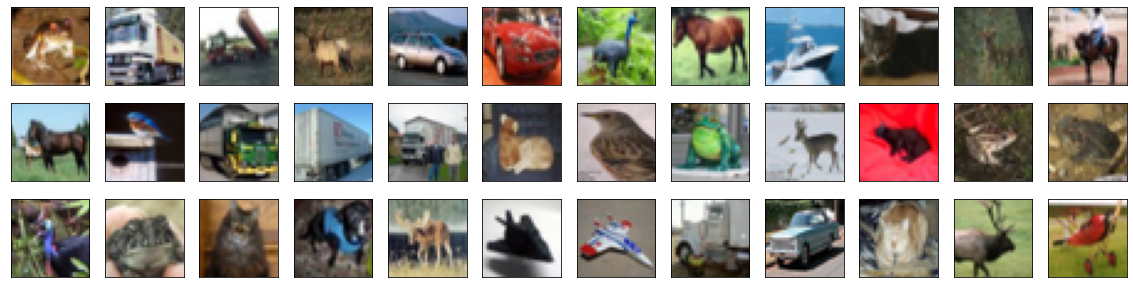

In [16]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i])

In [37]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
x_train = x_train/255.0
x_test = x_test/255.0

In [39]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(4, 4), padding='same', strides=1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)             

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') 

In [42]:
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=150)

Epoch 1/50
267/267 [==============================] - 2s 7ms/step - loss: 1.6322 - accuracy: 0.4026 - val_loss: 1.4349 - val_accuracy: 0.4774
Epoch 2/50
267/267 [==============================] - 2s 6ms/step - loss: 1.2424 - accuracy: 0.5533 - val_loss: 1.1846 - val_accuracy: 0.5734
Epoch 3/50
267/267 [==============================] - 2s 6ms/step - loss: 1.0637 - accuracy: 0.6237 - val_loss: 1.0494 - val_accuracy: 0.6322
Epoch 4/50
267/267 [==============================] - 2s 6ms/step - loss: 0.9383 - accuracy: 0.6710 - val_loss: 0.9807 - val_accuracy: 0.6574
Epoch 5/50
267/267 [==============================] - 2s 6ms/step - loss: 0.8544 - accuracy: 0.6996 - val_loss: 0.9231 - val_accuracy: 0.6716
Epoch 6/50
267/267 [==============================] - 2s 6ms/step - loss: 0.7792 - accuracy: 0.7266 - val_loss: 0.9226 - val_accuracy: 0.6798
Epoch 7/50
267/267 [==============================] - 2s 6ms/step - loss: 0.7083 - accuracy: 0.7509 - val_loss: 0.8345 - val_accuracy: 0.7143
Epoch 

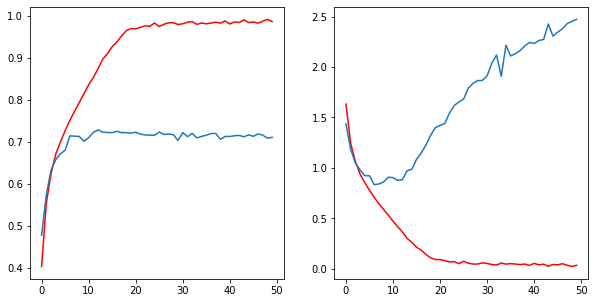

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r') 
plt.plot(hist.history['val_accuracy']) 
 
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r') 
plt.plot(hist.history['val_loss']) 

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.6057 - accuracy: 0.6967


[2.6056530475616455, 0.6966999769210815]

In [45]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

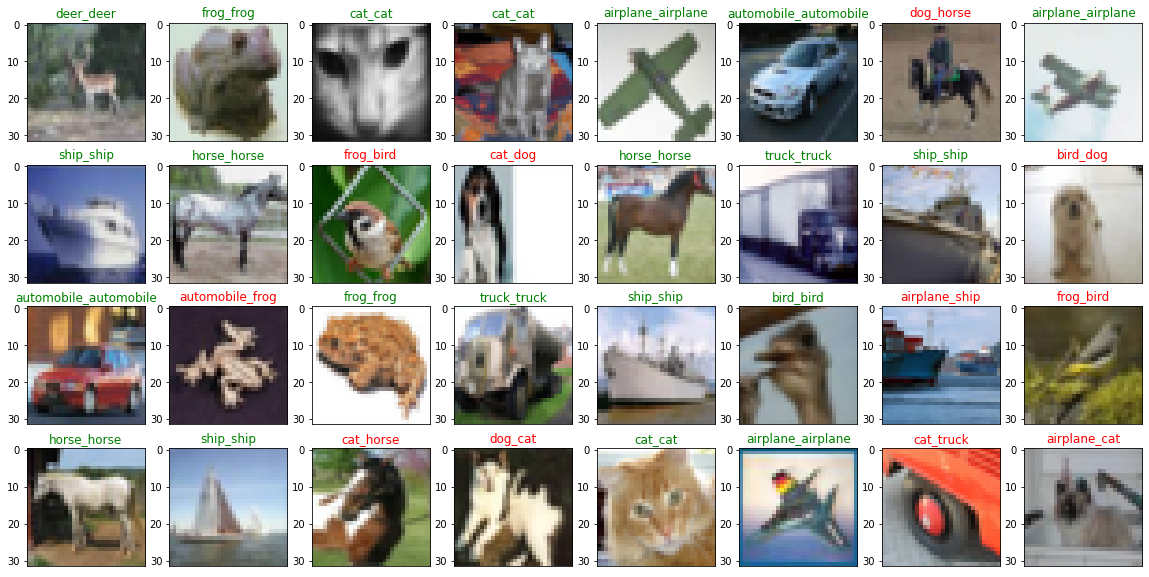

In [46]:
pred=model.predict(x_test)

fig = plt.figure(figsize = (20, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32)):
  ax = fig.add_subplot(4,8, i+1, xticks=[])
  ax.imshow(x_test[idx])

  pred_idx = np.argmax(pred[idx])
  true_idx = np.argmax(y_test[idx])

  ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx==true_idx else 'red')